In [43]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML

In [5]:
#Cargamos el archivo
data= pd.read_csv('CountryTable.csv') 
data

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


*****************************LIMPIEZA VALORES NULOS*********************************

In [6]:
#Se identidican los valores nulos de nuestro dataframe
data_Nulos= data.isnull().sum()
data_Nulos

code                  0
name                  0
continent             0
region                0
surface_area          0
independence_year    47
population            0
life_expectancy      17
gnp                   0
gnp_old              61
local_name            1
government_form       0
head_of_state         3
capital               7
code2                 1
dtype: int64

In [7]:
#Una vez identificados los valores nulos de cada columna se reemplazan
#de la siguiente manera

#“independence_year”: Rellenar con el valor “1900”
data["independence_year"] =data["independence_year"].fillna(1900) 
data

#“life_expectancy”: Rellenar con el valor “Media” de la columna
mean_lifeexpectancy=data['life_expectancy'].mean() 
data['life_expectancy'].fillna(value=mean_lifeexpectancy, inplace=True) 

#“gnp_old ”: Rellenar con el valor “Mediana” de la columna
mean_gnpold=data['gnp_old'].median() 
data['gnp_old'].fillna(value=mean_gnpold, inplace=True) 

#“local_name”: Rellenar con el string “Inexistente”
data["local_name"] =data["local_name"].fillna("Inexistente") 
data

#“head_of_state”: Rellenar con el string “Desconocido”
data["head_of_state"] =data["head_of_state"].fillna("Desconocido") 
data

#“capital ”: Rellenar con el valor “0”
data["capital"] =data["capital"].fillna(0) 
data

#“code2”: Rellenar con el string “NA”
data["code2"] =data["code2"].fillna("NA") 
data


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900.0,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,8421.0,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900.0,8000,76.1,63.2,8421.0,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,8421.0,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [11]:
#Verificamos que ya no tengamos valores nulos
data_Nulos= data.isnull().sum().sum()
data_Nulos

0

*****************************OUTLIERS*********************************

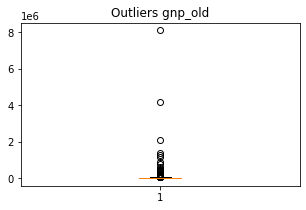

In [20]:
#Aplicar método de distribución normal para identificar Outliers,
#tomando como limites 2 desviaciones estándar, exclusivamente para las columnas “gnp old” y “population”, 
#obtener los diagramas de caja de cada una respectivamente.

#Visualizamos los datos de la variable gnp_old
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["gnp_old"]) 
plt.title("Outliers gnp_old")
plt.show() #dibujamos el diagrama

In [21]:
y=data["gnp_old"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_gnp_old= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_gnp_old

Limite superior permitido 1375629.5313349972
Limite inferior permitido -1124761.0041383444


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
72,FRA,France,Europe,Western Europe,551500.0,843.0,59225700,78.8,1424285.0,1392448.0,France,Republic,Jacques Chirac,2974.0,FR
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


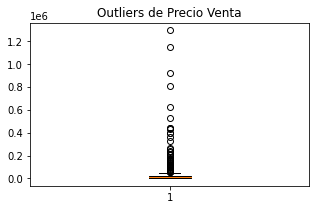

In [22]:
gnp_old_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(gnp_old_clean["gnp_old"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

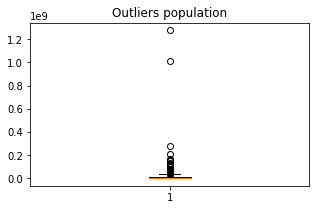

In [23]:
#Visualizamos los datos de la variable population
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["population"]) 
plt.title("Outliers population")
plt.show() #dibujamos el diagrama

In [ ]:
y2=data["population"]
Limite_Superior2= y2.mean() + 2*y.std()
Limite_Inferior2= y2.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior2)
print("Limite inferior permitido", Limite_Inferior2)

#Encontramos Ouliers
outliers_population= data[(y2>Limite_Superior2)|(y2<Limite_Inferior2)]
outliers_population

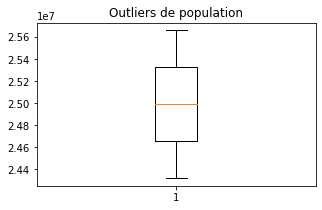

In [25]:
population_clean= data[(y2<=Limite_Superior2)&(y2>=Limite_Inferior2)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(population_clean["population"]) 
plt.title("Outliers de population")
plt.show() #dibujamos el diagrama

In [29]:
#Aplicar método de rango intercuartílico para identificar Outliers, tomando como limites 1.3 iqr,
# exclusivamente para las columnas “gnp old”, “surface área”, “life expectancy” y “population”, 
#obtener los diagramas de caja de cada una respectivamente.


#variable gnp_old
y3=data["gnp_old"]

percentile25=y3.quantile(0.25) #Q1
percentile75=y3.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.3*iqr
Limite_Inferior_iqr= percentile25 - 1.3*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

outliers_gnp_old2= data[(y3>Limite_Superior_iqr)|(y3<Limite_Inferior_iqr)]
outliers_gnp_old2

Limite superior permitido 67186.0
Limite inferior permitido -32552.0


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rua,69.0,AR
14,AuS,Australia,Oceania,Australia and New Zealand,7741220.0,1901.0,18886000,79.8,351182.0,392911.0,Australia,"Constitutional Monarchy, Federation",Elisabeth II,135.0,Au
15,AuT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,211860.0,206025.0,osterreich,Federal Republic,Thomas Klestil,1523.0,AT
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,249704.0,243948.0,Belgie/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE
30,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
37,CAN,Canada,North America,North America,9970610.0,1867.0,31147000,79.4,598862.0,625626.0,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822.0,CA
39,CHE,Switzerland,Europe,Western Europe,41284.0,1499.0,7160400,79.6,264478.0,256092.0,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH
40,CHL,Chile,South America,South America,756626.0,1810.0,15211000,75.7,72949.0,75780.0,Chile,Republic,Ricardo Lagos Escobar,554.0,CL
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
47,COL,Colombia,South America,South America,1138914.0,1810.0,42321000,70.3,102896.0,105116.0,Colombia,Republic,Andres Pastrana Arango,2257.0,CO


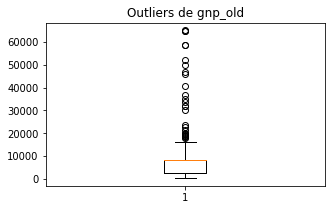

In [30]:
#Obtenemos datos limpios
data_gnp_old2= data[(y3<=Limite_Superior_iqr)&(y3>=Limite_Inferior_iqr)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_gnp_old2["gnp_old"]) 
plt.title("Outliers de gnp_old")
plt.show() #dibujamos el diagrama

In [ ]:
#variable surface_area
y4=data["surface_area"]

percentile25_2=y4.quantile(0.25) #Q1
percentile75_2=y4.quantile(0.75) #Q3
iqr2= percentile75_2- percentile25_2

Limite_Superior_iqr2= percentile75_2 + 1.3*iqr2
Limite_Inferior_iqr2= percentile25_2 - 1.3*iqr2
print("Limite superior permitido", Limite_Superior_iqr2)
print("Limite inferior permitido", Limite_Inferior_iqr2)

outliers_surface_area= data[(y4>Limite_Superior_iqr2)|(y4<Limite_Inferior_iqr2)]
outliers_surface_area

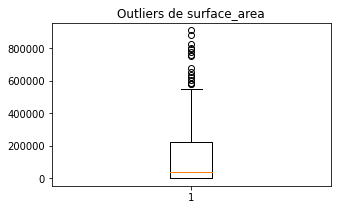

In [32]:
#Obtenemos datos limpios
data_surface_area= data[(y4<=Limite_Superior_iqr2)&(y4>=Limite_Inferior_iqr2)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_surface_area["surface_area"]) 
plt.title("Outliers de surface_area")
plt.show() #dibujamos el diagrama

In [ ]:
#life_expectancy

y5=data["life_expectancy"]

percentile25_3=y5.quantile(0.25) #Q1
percentile75_3=y5.quantile(0.75) #Q3
iqr3= percentile75_3- percentile25_3

Limite_Superior_iqr3= percentile75_3 + 1.3*iqr3
Limite_Inferior_iqr3= percentile25_3 - 1.3*iqr3
print("Limite superior permitido", Limite_Superior_iqr3)
print("Limite inferior permitido", Limite_Inferior_iqr3)

outliers_life_expectancy= data[(y5>Limite_Superior_iqr3)|(y5<Limite_Inferior_iqr3)]
outliers_life_expectancy

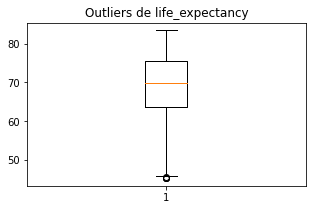

In [34]:
#Obtenemos datos limpios
data_life_expectancy= data[(y5<=Limite_Superior_iqr3)&(y5>=Limite_Inferior_iqr3)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_life_expectancy["life_expectancy"]) 
plt.title("Outliers de life_expectancy")
plt.show() #dibujamos el diagrama

In [ ]:
#“population”
y6=data["population"]

percentile25_4=y6.quantile(0.25) #Q1
percentile75_4=y6.quantile(0.75) #Q3
iqr4= percentile75_4- percentile25_4

Limite_Superior_iqr4= percentile75_4 + 1.3*iqr4
Limite_Inferior_iqr4= percentile25_4 - 1.3*iqr4
print("Limite superior permitido", Limite_Superior_iqr4)
print("Limite inferior permitido", Limite_Inferior_iqr4)

outliers_population= data[(y6>Limite_Superior_iqr4)|(y6<Limite_Inferior_iqr4)]
outliers_population


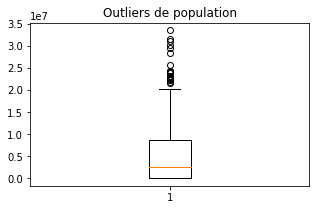

In [38]:
#Obtenemos datos limpios
data_population= data[(y6<=Limite_Superior_iqr4)&(y6>=Limite_Inferior_iqr4)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_population["population"]) 
plt.title("Outliers de population")
plt.show() #dibujamos el diagrama

In [40]:
#Aplicar método de distribución normal para identificar Outliers, 
#tomando como limites 3 desviaciones estándar, exclusivamente para la columna “gnp old” 
# y sustituirlos por el promedio de la columna en caso de haberlos.

#gnp_old
y7=data["gnp_old"]
Limite_Superior5= y7.mean() + 3*y7.std()
Limite_Inferior5= y7.mean() - 3*y7.std()
print("Limite superior permitido", Limite_Superior5)
print("Limite inferior permitido", Limite_Inferior5)

#Encontramos Ouliers
outliers_gnp_old= data[(y7>Limite_Superior5)|(y7<Limite_Inferior5)]
outliers_gnp_old

Limite superior permitido 2000727.1652033327
Limite inferior permitido -1749858.63800668


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


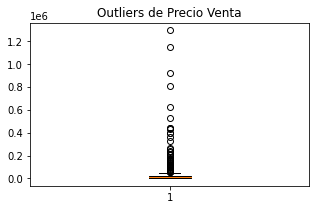

In [42]:
gnp_old_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(gnp_old_clean["gnp_old"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

*****************************TRANSFORMACIONES*********************************

In [69]:
data2 = data.dropna()
data2= data.pivot(index='code', columns='continent',  values='population')
data2.iplot(kind='line', xTitle='Continent', yTitle='Population', title='Population by Country')


In [63]:
# Barplot o grafico de barras
data2_muestra = data2[data2.index.isin(["ROM","ATF","FRA"])]
# plotting
data2_muestra.iplot(kind='bar', xTitle='Country',
                           yTitle='Population', title='Population by Country')

In [65]:
# Boxplot o grafico de caja
data2.iplot(kind='box', xTitle='Country',
                    yTitle='Population', title='Continent Population Distribution')

In [73]:
#Histplot o Histograma
data2[['Europe']].iplot(kind='hist',xTitle='Population', 
                               title='Distibución of Population')

In [75]:
#Scatterplot o Mapa de dispersión
data2[['Asia']].iplot(kind='scatter', mode='markers',xTitle='Country', 
                               title='Distibución of Countries by population')

In [81]:
data3 = data.dropna()
data3= data.pivot(index='name', columns='region',  values='surface_area')
data3.iplot(kind='line', xTitle='region', yTitle='surface_area', title='Surface area by Region')

In [82]:
# Barplot o grafico de barras
data3_muestra = data3[data3.index.isin(["Chile","Malawi"])]
# plotting
data3_muestra.iplot(kind='bar', xTitle='region',
                           yTitle='surface_area', title='Surface area by Region')

In [84]:
# Boxplot o grafico de caja
data3.iplot(kind='box', xTitle='region',
                    yTitle='surface_area', title='Surface area by Region')

In [89]:
#Histplot o Histograma
data3[['Caribbean']].iplot(kind='hist',xTitle='region', 
                               title='Caribbean Surface area')

In [88]:
#Scatterplot o Mapa de dispersión
data3[['Caribbean']].iplot(kind='scatter', mode='markers',xTitle='region', 
                               title='Distibución of Regions by Surface area')

In [92]:
data4 = data.dropna()
data4= data.pivot(index='local_name', columns='government_form',  values='independence_year')
data4.iplot(kind='line', xTitle='Local name', yTitle='independence_year', title='Independence year by local name and government_form')

In [94]:
# Barplot o grafico de barras
data4_muestra = data4[data4.index.isin(["Lao","Nigeria"])]
# plotting
data4_muestra.iplot(kind='bar', xTitle='Local name',
                           yTitle='independence_year', title='Independence year by local name and government_form')

In [96]:
# Boxplot o grafico de caja
data4.iplot(kind='box', xTitle='Local name',
                    yTitle='independence_year', title='Independence year by local name and government_form')

In [101]:
#Histplot o Histograma
data4[['Monarchy']].iplot(kind='hist',xTitle='independence_year', 
                               title='Distribution of local names by Monarchy')

In [105]:
#Scatterplot o Mapa de dispersión
data4[['Monarchy']].iplot(kind='scatter', mode='markers',xTitle='Local Names', 
                               title='Local names distributión by Monarchy ')